## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [7]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [68]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [70]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [25]:
train.isnull().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [27]:
test.isnull().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [31]:
train.duplicated().sum()

0

In [33]:
test.duplicated().sum()

0

Пропусков и дублей нету

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [127]:
train



tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0              -0.959434              -0.992165             0.977436   
1              -0.979289              -0.989876             0.984520   
2              -0.983703              -0.987868             0.986770   
3              -0.986542              -0.991241             0.986821   
4              -0.992827              -0.992882             0.987434   
...                  ...                    ...                  ...   
7347           -0.031719              -0.533656             0.920554   
7348           -0.065256              -0.609540             0.920554   
7349           -0.003936              -0.662918             0.933008   
7350           -0.002445              -0.645452             0.933008   
7351           -0.049090              -0.688840             0.916729   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0            -0.934724                     -0.993592             -0.841247   
1            -0.943068                     -0.998235             -0.844788   
2            -0.938692                     -0.999388             -0.848933   
3            -0.938692                     -0.999807             -0.848649   
4            -0.942469                     -0.999806             -0.847865   
...                ...                           ...                   ...   
7347          0.210795                     -0.274644             -0.791883   
7348          0.117440                     -0.310596             -0.771840   
7349          0.043999                      0.034897             -0.779133   
7350          0.101702                      0.040506             -0.785181   
7351          0.269013                     -0.106766             -0.783267   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
0                 0.179941             -0.058627               0.142051   
1                 0.180289             -0.054317              -0.692541   
2                 0.180637             -0.049118              -0.727227   
3                 0.181935             -0.047663              -0.599118   
4                 0.185151             -0.043892              -0.676997   
...                    ...                   ...                    ...   
7347              0.238604              0.049819              -0.154387   
7348              0.252676              0.050053              -0.053694   
7349              0.249145              0.040811               0.363110   
7350              0.246432              0.025339               0.382837   
7351              0.246809              0.036695              -0.243589   

      subject          Activity  
0           1          STANDING  
1           1          STANDING  
2           1          STANDING  
3           1          STANDING  
4           1          STANDING  
...       ...               ...  
7347       30  WALKING_UPSTAIRS  
7348       30  WALKING_UPSTAIRS  
7349       30  WALKING_UPSTAIRS  
7350       30  WALKING_UPSTAIRS  
7351       30  WALKING_UPSTAIRS  

[7352 rows x 11 columns]

In [172]:
test



tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0              -0.866929              -0.910363             0.944461   
1              -0.968961              -0.968614             0.944461   
2              -0.976228              -0.983723             0.948704   
3              -0.974325              -0.983995             0.947309   
4              -0.975836              -0.988244             0.946221   
...                  ...                    ...                  ...   
2942           -0.200885              -0.652975             0.903413   
2943           -0.170563              -0.626430             0.903793   
2944           -0.207603              -0.653267             0.903793   
2945           -0.233866              -0.716997             0.909007   
2946           -0.224309              -0.694131             0.909007   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0            -0.894088                     -0.924705             -0.720009   
1            -0.894088                     -0.997186             -0.698091   
2            -0.939260                     -0.999083             -0.702771   
3            -0.938610                     -0.999171             -0.698954   
4            -0.938610                     -0.999355             -0.692245   
...                ...                           ...                   ...   
2942          0.185361                     -0.708900             -0.651732   
2943          0.185361                     -0.685810             -0.655181   
2944          0.007471                     -0.735537             -0.655357   
2945          0.007471                     -0.721997             -0.659719   
2946         -0.111527                     -0.744050             -0.660080   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
0                 0.276801             -0.057978              -0.571999   
1                 0.281343             -0.083898              -0.918176   
2                 0.280083             -0.079346              -0.384114   
3                 0.284114             -0.077108              -0.635581   
4                 0.290722             -0.073857              -0.507391   
...                    ...                   ...                    ...   
2942              0.274627              0.184784              -0.073249   
2943              0.273578              0.182412              -0.328521   
2944              0.274479              0.181184               0.143487   
2945              0.264782              0.187563               0.233824   
2946              0.263936              0.188103              -0.053749   

      subject          Activity  
0           2          STANDING  
1           2          STANDING  
2           2          STANDING  
3           2          STANDING  
4           2          STANDING  
...       ...               ...  
2942       24  WALKING_UPSTAIRS  
2943       24  WALKING_UPSTAIRS  
2944       24  WALKING_UPSTAIRS  
2945       24  WALKING_UPSTAIRS  
2946       24  WALKING_UPSTAIRS  

[2947 rows x 11 columns]

In [150]:
train[['tBodyAccMag-mean()', 'tBodyGyroJerk-mad()-X', 'tGravityAcc-min()-X', 'tBodyAcc-max()-X', 'fBodyAcc-bandsEnergy()-1,8.2', \
      'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'fBodyAcc-skewness()-X']].quantile([0.25, 0.5, 0.75])

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0.25           -0.983282              -0.991595             0.804270   
0.50           -0.883371              -0.950268             0.926693   
0.75           -0.106892              -0.474625             0.965095   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0.25         -0.936219                     -0.999480             -0.812065   
0.50         -0.881637                     -0.986582             -0.709417   
0.75         -0.017129                     -0.764508             -0.509079   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  
0.25             -0.017885             -0.143414              -0.486841  
0.50              0.182071              0.003181              -0.163271  
0.75              0.248353              0.107659               0.155112

In [174]:
test[['tBodyAccMag-mean()', 'tBodyGyroJerk-mad()-X', 'tGravityAcc-min()-X', 'tBodyAcc-max()-X', 'fBodyAcc-bandsEnergy()-1,8.2', \
      'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'fBodyAcc-skewness()-X']].quantile([0.25, 0.5, 0.75])

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0.25           -0.978433              -0.989078             0.836787   
0.50           -0.861830              -0.914698             0.934930   
0.75           -0.149596              -0.486423             0.970871   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0.25         -0.934447                     -0.999330             -0.829722   
0.50         -0.852659                     -0.979336             -0.729648   
0.75         -0.009965                     -0.799113             -0.545939   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  
0.25              0.022140             -0.098485              -0.497070  
0.50              0.181563             -0.010671              -0.202050  
0.75              0.260252              0.092373               0.140254

In [164]:
train[['tBodyAccMag-mean()', 'tBodyGyroJerk-mad()-X', 'tGravityAcc-min()-X', 
               'tBodyAcc-max()-X', 'fBodyAcc-bandsEnergy()-1,8.2', 
               'angle(X,gravityMean)', 'angle(Y,gravityMean)', 
               'angle(Z,gravityMean)', 'fBodyAcc-skewness()-X']].agg(['mean', 'median', 'min', 'max', 'std'])

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
mean             -0.543884              -0.727735             0.678505   
median           -0.883371              -0.950268             0.926693   
min              -1.000000              -0.999889            -1.000000   
max               1.000000               1.000000             1.000000   
std               0.477653               0.315832             0.508656   

        tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
mean           -0.468604                     -0.847963             -0.489547   
median         -0.881637                     -0.986582             -0.709417   
min            -1.000000                     -1.000000             -1.000000   
max             1.000000                      1.000000              1.000000   
std             0.544547                      0.233633              0.511807   

        angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  
mean                0.058593             -0.056515              -0.128562  
median              0.182071              0.003181              -0.163271  
min                -1.000000             -1.000000              -0.931208  
max                 0.478157              1.000000               1.000000  
std                 0.297480              0.279122               0.403686

In [176]:
test[['tBodyAccMag-mean()', 'tBodyGyroJerk-mad()-X', 'tGravityAcc-min()-X', 
               'tBodyAcc-max()-X', 'fBodyAcc-bandsEnergy()-1,8.2', 
               'angle(X,gravityMean)', 'angle(Y,gravityMean)', 
               'angle(Z,gravityMean)', 'fBodyAcc-skewness()-X']].agg(['mean', 'median', 'min', 'max', 'std'])

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
mean             -0.559043              -0.735661             0.696878   
median           -0.861830              -0.914698             0.934930   
min              -0.998936              -1.000000            -0.756774   
max               0.479547               0.117606             0.996148   
std               0.439539               0.282074             0.502873   

        tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
mean           -0.462063                     -0.880361             -0.513923   
median         -0.852659                     -0.979336             -0.729648   
min            -0.952357                     -0.999989             -0.984195   
max             0.786436                      0.048730              0.833180   
std             0.523916                      0.160496              0.509205   

        angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  
mean                0.074886             -0.048720              -0.154042  
median              0.181563             -0.010671              -0.202050  
min                -0.913704             -0.949228              -1.000000  
max                 1.000000              0.973113               0.960367  
std                 0.324300              0.241467               0.392203

Абсолютно все признаки(за исключением subject и последнего категориального) распределены на промежутке от -1 до 1. Медианное и среднее значение довольно сильно разнятся, при этом по значению перцентилей, среднего и медианы можно заметить что распределения ассиметричны. Значения параметров различаются в зависимости от типа активности. Также можно заметить, что в test такие показатели как tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean) принимают максимальные и минимальные значения достаточно далеко от 1.

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [210]:
train_percents = train.groupby('Activity').size() / len(train)

In [212]:
train_percents

Activity
LAYING                0.191376
SITTING               0.174918
STANDING              0.186888
WALKING               0.166757
WALKING_DOWNSTAIRS    0.134113
WALKING_UPSTAIRS      0.145947
dtype: float64

In [234]:
train_percents.max() - train_percents.min()

0.057263329706202376

0.057263329706202376 < 0.3 значит данные в train сбалансированы

In [216]:
test_percents = test.groupby('Activity').size() / len(test)

In [220]:
test_percents

Activity
LAYING                0.182219
SITTING               0.166610
STANDING              0.180523
WALKING               0.168307
WALKING_DOWNSTAIRS    0.142518
WALKING_UPSTAIRS      0.159824
dtype: float64

In [222]:
test_percents.max() - test_percents.min()

0.03970139124533423

0.03970139124533423 < 0.3 значит данные в test сбалансированы

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [258]:
train_numeric = pd.get_dummies(train, columns=['Activity'], drop_first=False)

In [266]:
train_numeric.corr().style.background_gradient(cmap='seismic')

Сразу замечаем, что усредненная величина ускорения тела и медианная величина рывка тела по оси Х имеют высокий коэфициент корреляции, это говорит о том что меиданное значение сильно зависит от среднего, далее видим высокую корреляцию у tBodyAcc-max()-X и tBodyAccMag-mean()(максимальная и усредненная величина ускорения тела). Заметим еще высокую корреляцию медианная величина рывка тела по оси Х и максимальная величина ускорения тела по оси Х, то есть рывок зависит от ускорения и наоборот(достаточно логично). Похожие выводы можно заключить в выборке test.














In [276]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [278]:
test_numeric = pd.get_dummies(test, columns=['Activity'], drop_first=False)

In [270]:
test_numeric.corr().style.background_gradient(cmap='seismic')

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

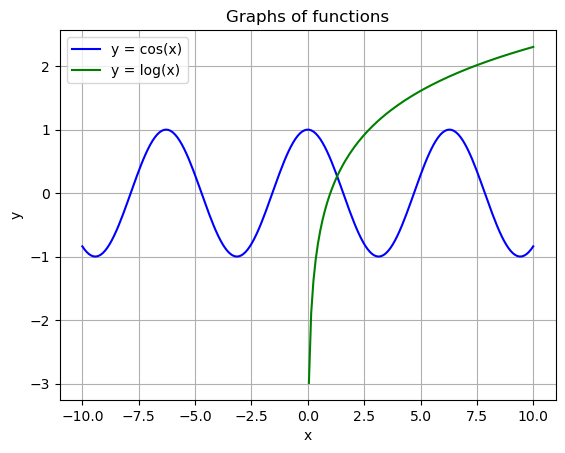

In [337]:
x = np.linspace(-10, 10, 200)
y1 = np.cos(x)
y2 = np.log(x)

plt.plot(x, y1, label='y = cos(x)', color='b')
plt.plot(x, y2, label='y = log(x)', color='g')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphs of functions')

plt.legend()
plt.grid(True)
plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

In [742]:
activity_counts = train['Activity'].value_counts()
activity_counts_2 = test['Activity'].value_counts()

In [744]:
activities = activity_counts.index.tolist()
counts = activity_counts.values.tolist()

activities_2 = activity_counts_2.index.tolist()
counts_2 = activity_counts_2.values.tolist()

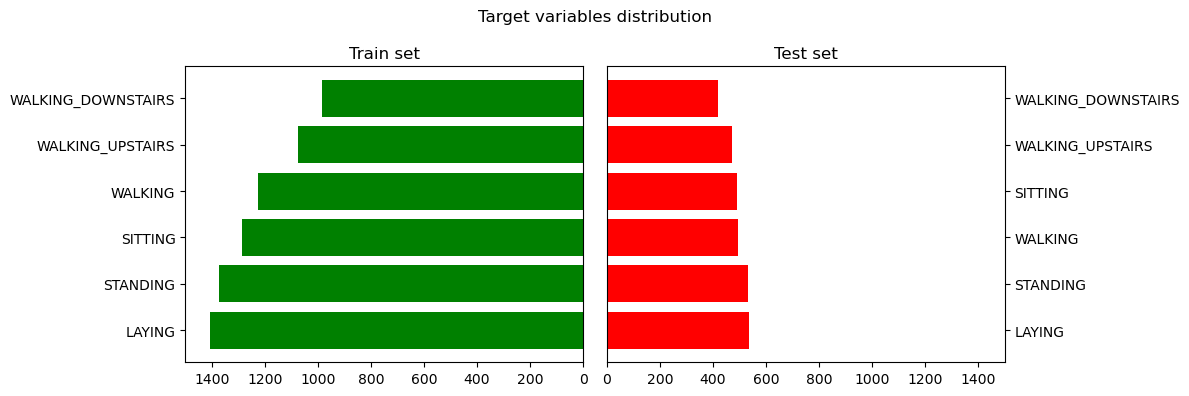

In [786]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].barh(activities, counts, color='green')
axes[0].set_title("Train set")
axes[0].set_xlim(1500, 0)


axes[1].barh(activities_2, counts_2, color='red')
axes[1].set_title("Test set")
axes[1].set_xlim(0, 1500)
axes[1].yaxis.tick_right()

fig.suptitle('Target variables distribution')
plt.tight_layout()

plt.show()


Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

In [804]:
train.corr(numeric_only=True).round(2)

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                          1.00                   0.90   
tBodyGyroJerk-mad()-X                       0.90                   1.00   
tGravityAcc-min()-X                         0.37                   0.38   
tBodyAcc-max()-X                            0.96                   0.88   
fBodyAcc-bandsEnergy()-1,8.2                0.70                   0.51   
angle(X,gravityMean)                       -0.37                  -0.38   
angle(Y,gravityMean)                        0.50                   0.48   
angle(Z,gravityMean)                        0.43                   0.38   
fBodyAcc-skewness()-X                       0.38                   0.27   
subject                                    -0.07                  -0.11   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                           0.37              0.96   
tBodyGyroJerk-mad()-X                        0.38              0.88   
tGravityAcc-min()-X                          1.00              0.38   
tBodyAcc-max()-X                             0.38              1.00   
fBodyAcc-bandsEnergy()-1,8.2                 0.24              0.61   
angle(X,gravityMean)                        -0.99             -0.38   
angle(Y,gravityMean)                         0.80              0.48   
angle(Z,gravityMean)                         0.67              0.41   
fBodyAcc-skewness()-X                       -0.26              0.34   
subject                                     -0.04             -0.06   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                    0.70   
tBodyGyroJerk-mad()-X                                 0.51   
tGravityAcc-min()-X                                   0.24   
tBodyAcc-max()-X                                      0.61   
fBodyAcc-bandsEnergy()-1,8.2                          1.00   
angle(X,gravityMean)                                 -0.21   
angle(Y,gravityMean)                                  0.36   
angle(Z,gravityMean)                                  0.42   
fBodyAcc-skewness()-X                                 0.26   
subject                                              -0.04   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                           -0.37                  0.50   
tBodyGyroJerk-mad()-X                        -0.38                  0.48   
tGravityAcc-min()-X                          -0.99                  0.80   
tBodyAcc-max()-X                             -0.38                  0.48   
fBodyAcc-bandsEnergy()-1,8.2                 -0.21                  0.36   
angle(X,gravityMean)                          1.00                 -0.78   
angle(Y,gravityMean)                         -0.78                  1.00   
angle(Z,gravityMean)                         -0.64                  0.59   
fBodyAcc-skewness()-X                         0.27                 -0.05   
subject                                       0.03                 -0.01   

                              angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
tBodyAccMag-mean()                            0.43                   0.38   
tBodyGyroJerk-mad()-X                         0.38                   0.27   
tGravityAcc-min()-X                           0.67                  -0.26   
tBodyAcc-max()-X                              0.41                   0.34   
fBodyAcc-bandsEnergy()-1,8.2                  0.42                   0.26   
angle(X,gravityMean)                         -0.64                   0.27   
angle(Y,gravityMean)                          0.59                  -0.05   
angle(Z,gravityMean)                          1.00                  -0.18   
fBodyAcc-skewness()-X                        -0.18                   1.00   
subject                                      -0.10                   0.02   

                              subject  
tBodyAccMag-me

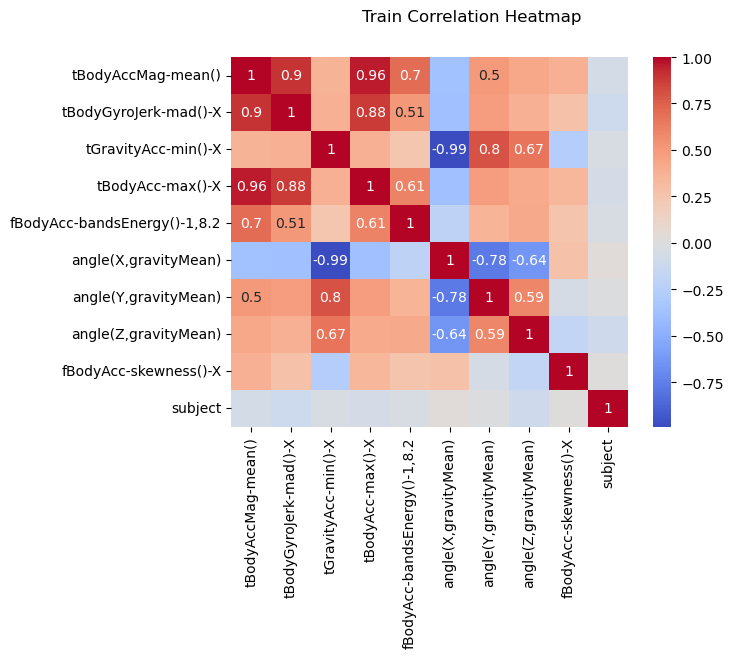

In [870]:
cor = train.corr(numeric_only=True).round(2)
dataplot = sns.heatmap(cor, cmap="coolwarm", annot=True)

for t in dataplot.texts:
    t.set_text(t.get_text()) if abs(float(t.get_text())) >= 0.5 else t.set_text("")

plt.suptitle('Train Correlation Heatmap')
plt.show()

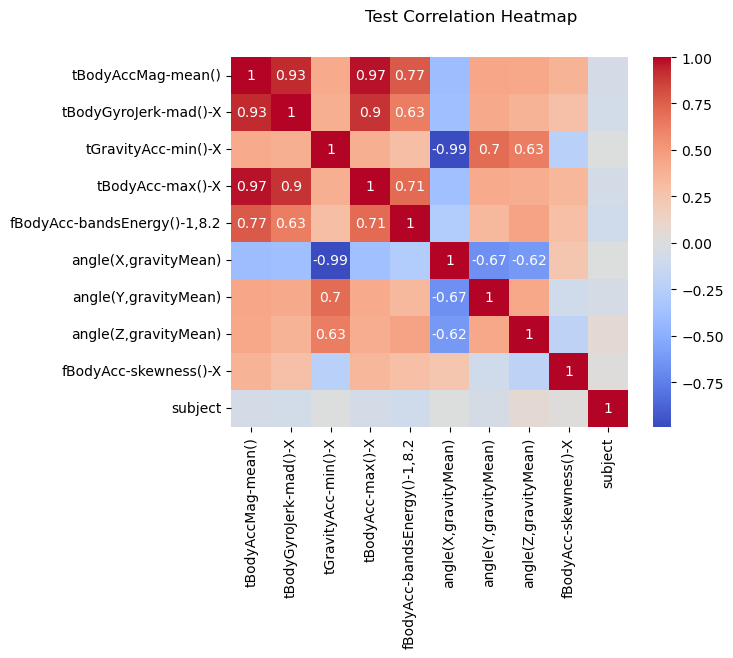

In [872]:
cor_2 = test.corr(numeric_only=True).round(2)
dataplot_2 = sns.heatmap(cor_2, cmap="coolwarm", annot=True)

for t in dataplot_2.texts:
    t.set_text(t.get_text()) if abs(float(t.get_text())) >= 0.5 else t.set_text("")

plt.suptitle('Test Correlation Heatmap')
plt.show()

Из карты корреляций стоит исключить subject, поскольку очевидно что номер испытуемого никак не связан с остальными признаками и не зависит от них.

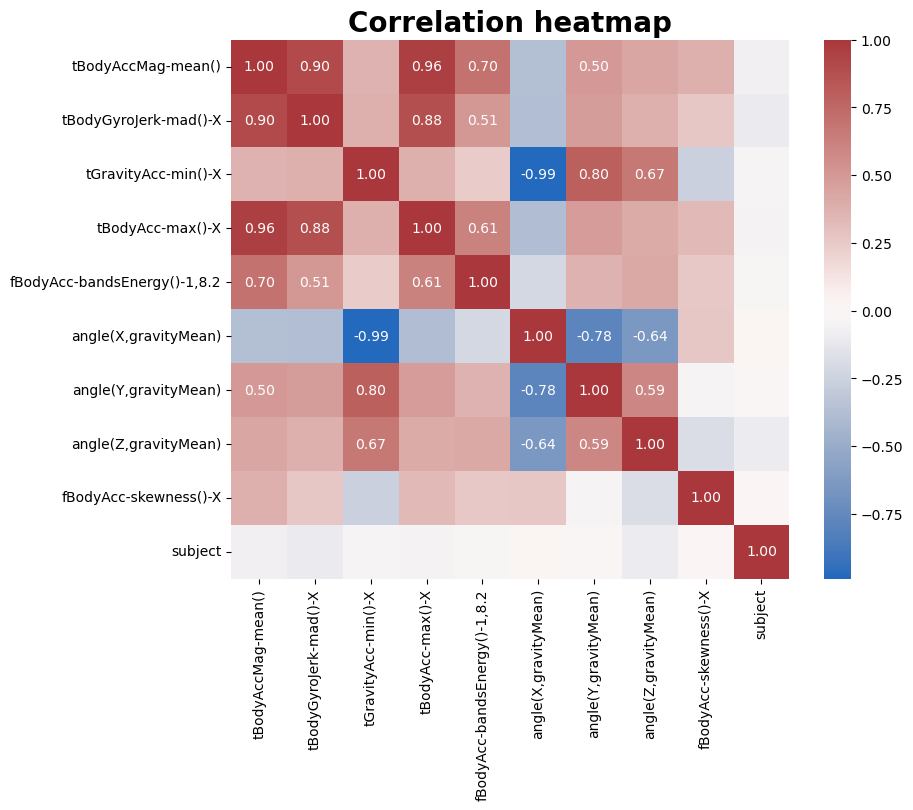

In [ ]:
# ღゝ◡╹)ノ♡ your code here

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

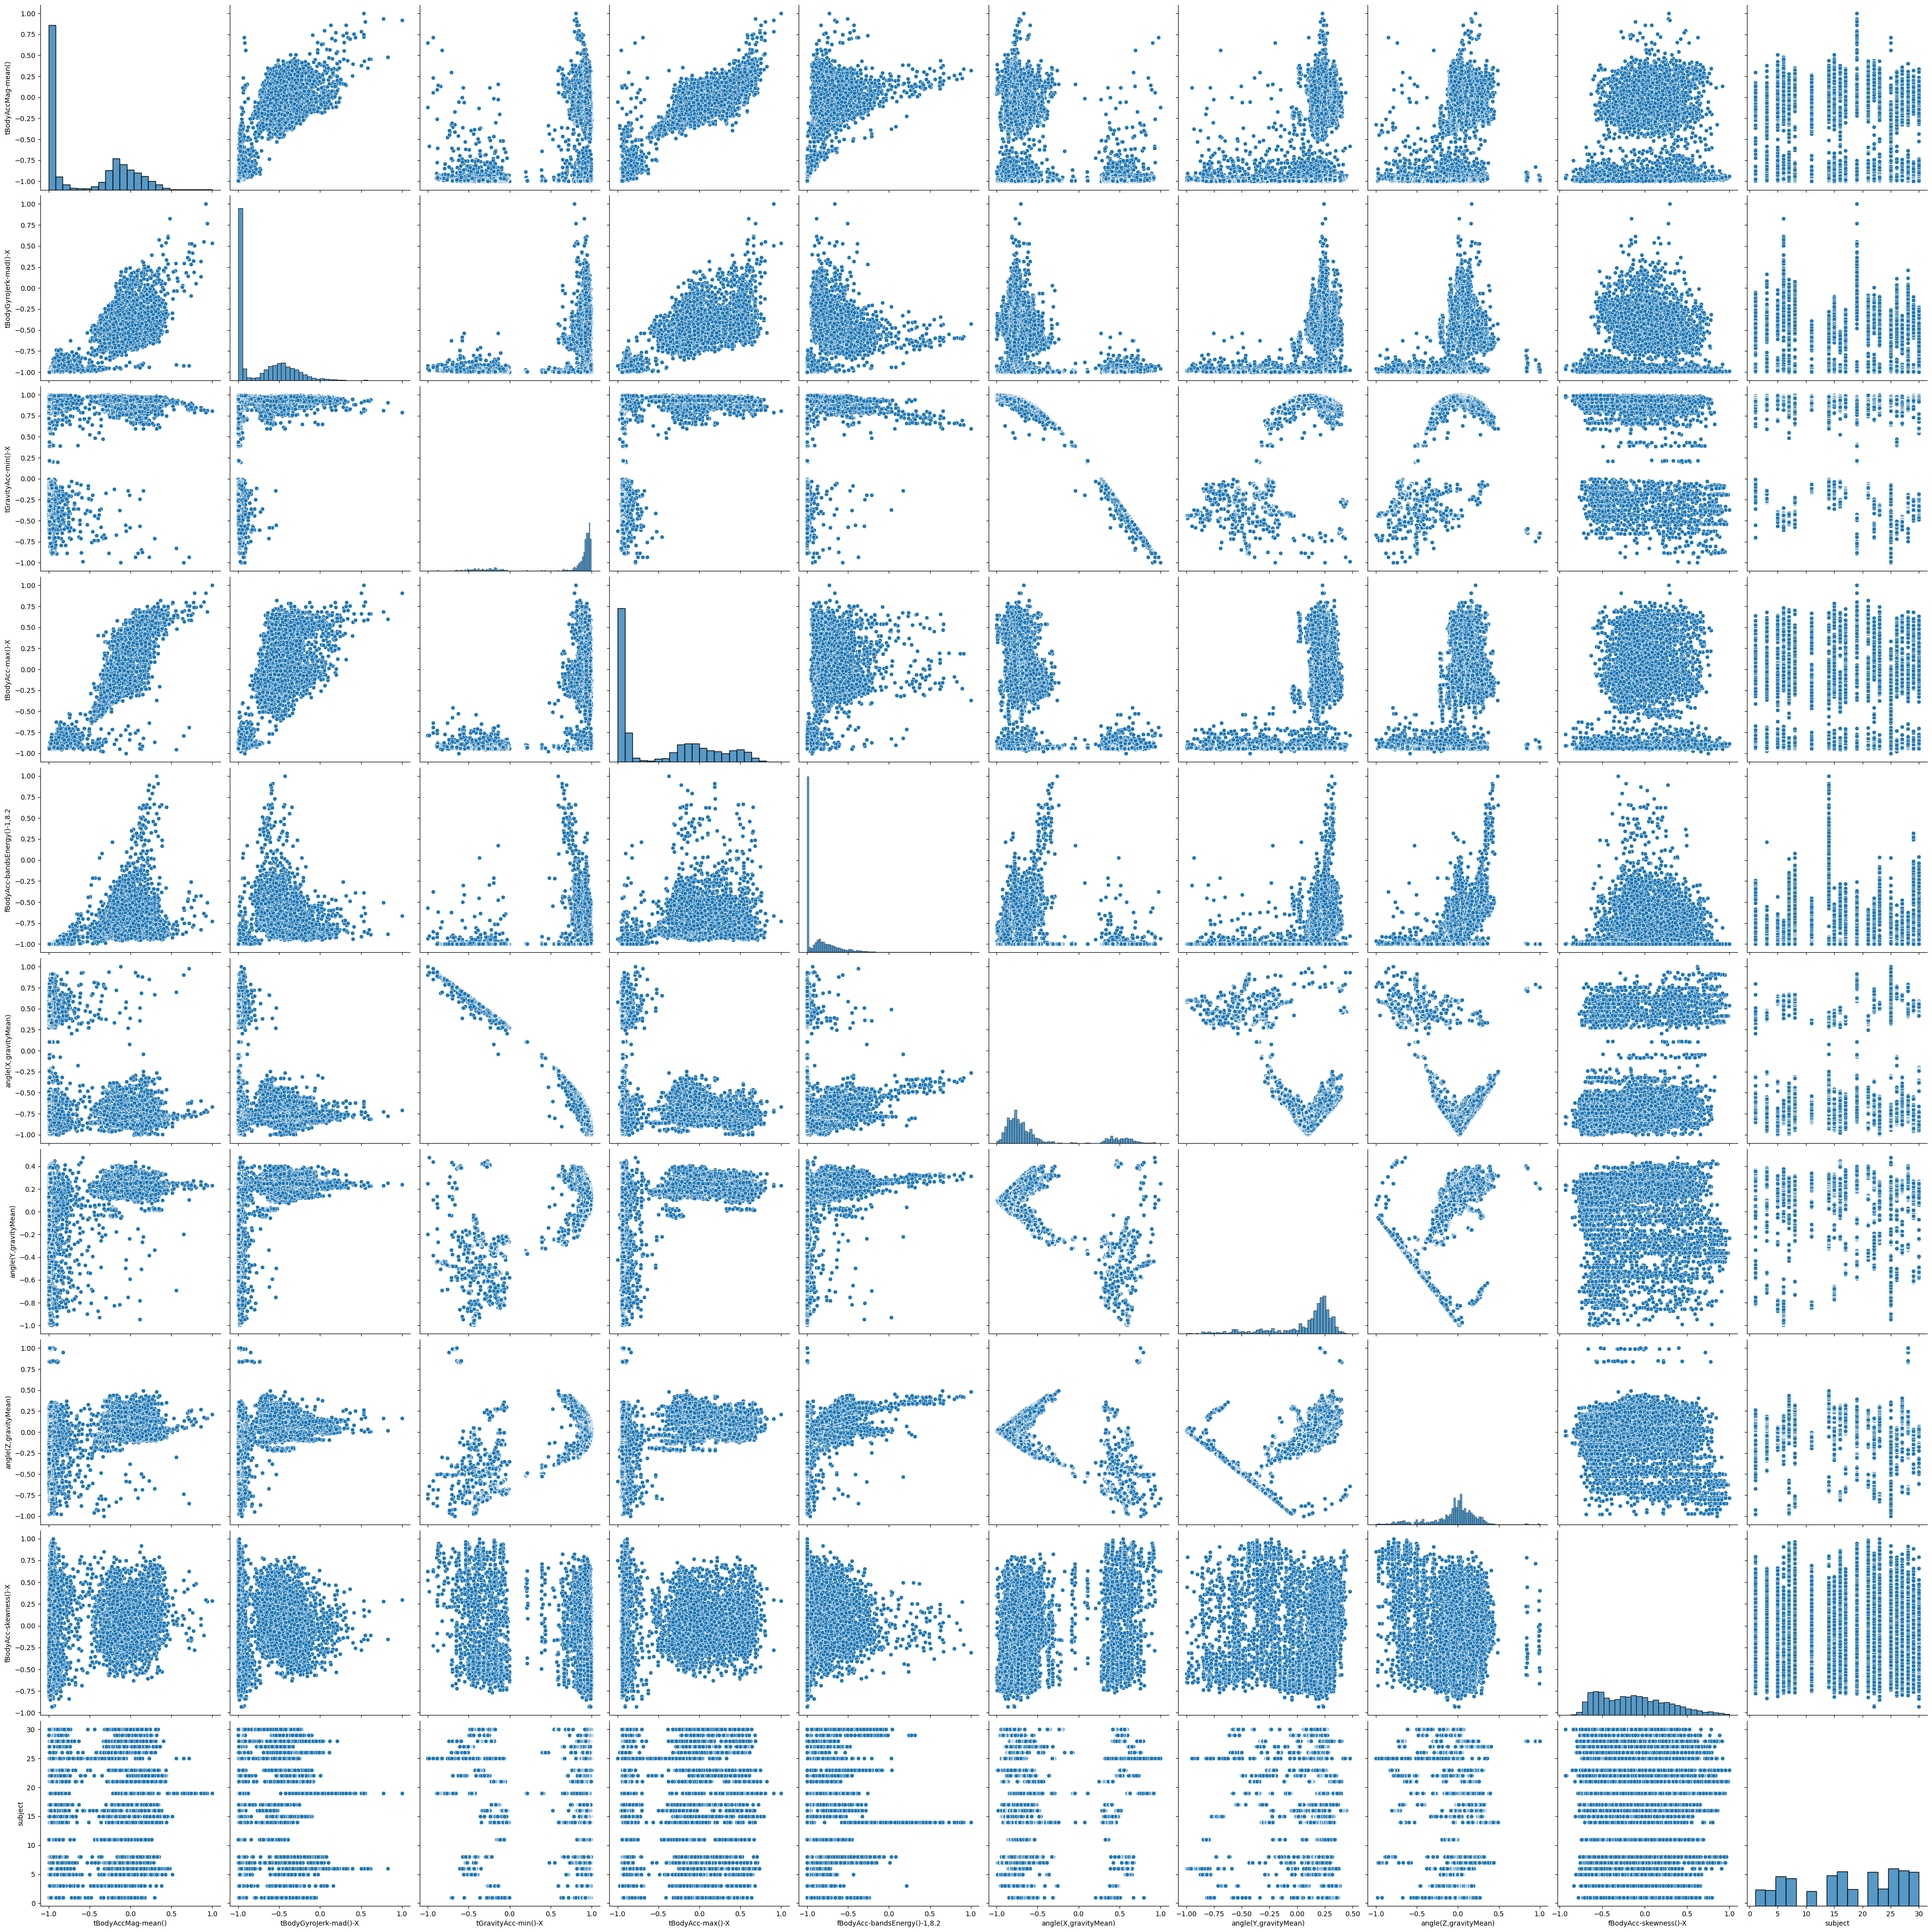

In [908]:
data = sns.pairplot(
    train[[
        
        "tBodyAccMag-mean()", 
        "tBodyGyroJerk-mad()-X", 
        "tGravityAcc-min()-X", 
        "tBodyAcc-max()-X", 
        "fBodyAcc-bandsEnergy()-1,8.2", 
        "angle(X,gravityMean)",
        "angle(Y,gravityMean)",
        "angle(Z,gravityMean)",
        "fBodyAcc-skewness()-X",
        "subject"
    
    ]],
    
    palette="seismic",
    size=4,

)

Интересного заметил мало, поскольку анализировать сто графиков сразу очень неудобно(((((((

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

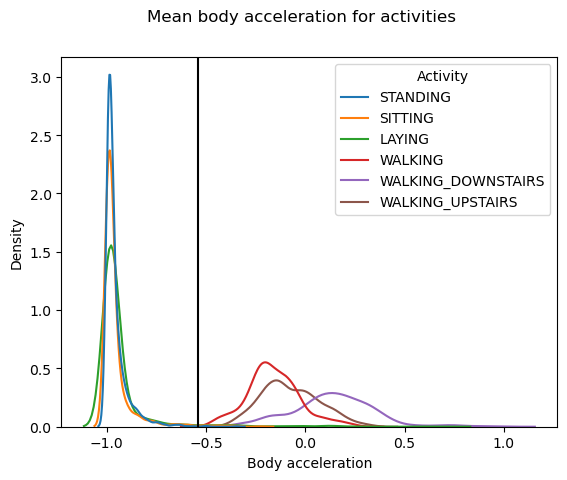

In [1053]:


sns.kdeplot(data=train, hue="Activity", x="tBodyAccMag-mean()")

plt.suptitle('Mean body acceleration for activities')
plt.xlabel('Body acceleration')
plt.ylabel('Density')

plt.axvline(-0.54, c="black")
density.add_legend(fontsize=20);

In [1057]:
guess = -0.54


predictions = train["tBodyAccMag-mean()"].apply(lambda x: "Static" if x < guess else "Dynamic")
true_labels = train["Activity"].apply(lambda x: "Static" if x in ["STANDING", "SITTING", "LAYING"] else "Dynamic")

accuracy = (predictions == true_labels).mean()

print(f"Точность разделения: {accuracy:.2%}")


Точность разделения: 99.10%


tBodyAccMag-mean() - усредненная величина ускорения тела

Данный признак хорошо разделяет активности на две группы. Статистические типы активностей имеют меньшие значения величины ускорения тела, поскольку во время этих типов активности тело неподвижно, динамические же, наоборот, имеют более высокие показатели, поскольку тело движется.

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

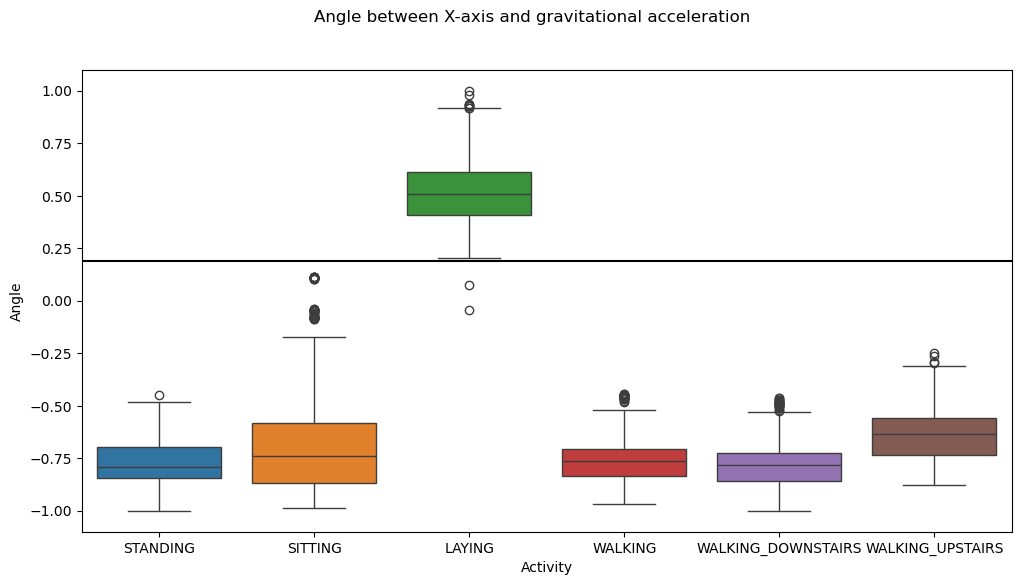

In [436]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Activity", y="angle(X,gravityMean)", hue="Activity", data=train)
plt.suptitle('Angle between X-axis and gravitational acceleration')
plt.xlabel('Activity')
plt.ylabel('Angle')

plt.axhline(0.19, c="black")
plt.show()

Значительно выделяется категория LAYING, поскольку значение угла между осью X и усредненной гравитационной составляющей ускорения(в целом угол между осью x и человеком когда он лежит) значительно отличается от остальных положений человека в других активностях(видно из графика).

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

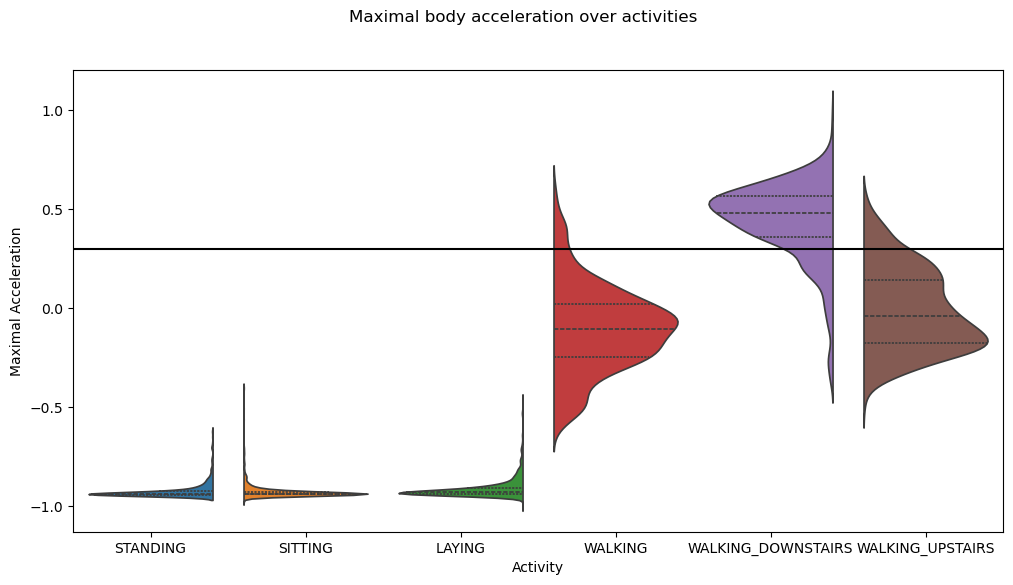

In [378]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Activity", y="tBodyAcc-max()-X", hue="Activity", split=True, data=train,  inner="quartile")
plt.suptitle('Maximal body acceleration over activities')
plt.xlabel('Activity')
plt.ylabel('Maximal Acceleration')

plt.axhline(0.3, c="black")

plt.show()

'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х

Да, на графике хорошо просматриваются статистические и динамические активности. В динамических активностях WALKING DOWNSTAIRS имеет другую стуктуру распределения данных, поскольку при спуске человек оказывает сопротивление своему движению, так как скорость изменяется, в связи с этим большинство значений находится выше 0. Максимальная величина ускорения по оси X при спуске вниз по лестнице будет больше, чем при подъеме или обычной походке, из-за влияния гравитации и необходимости контролировать движение при изменении скорости, чтобы поддерживать равновесие и избегать падений.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

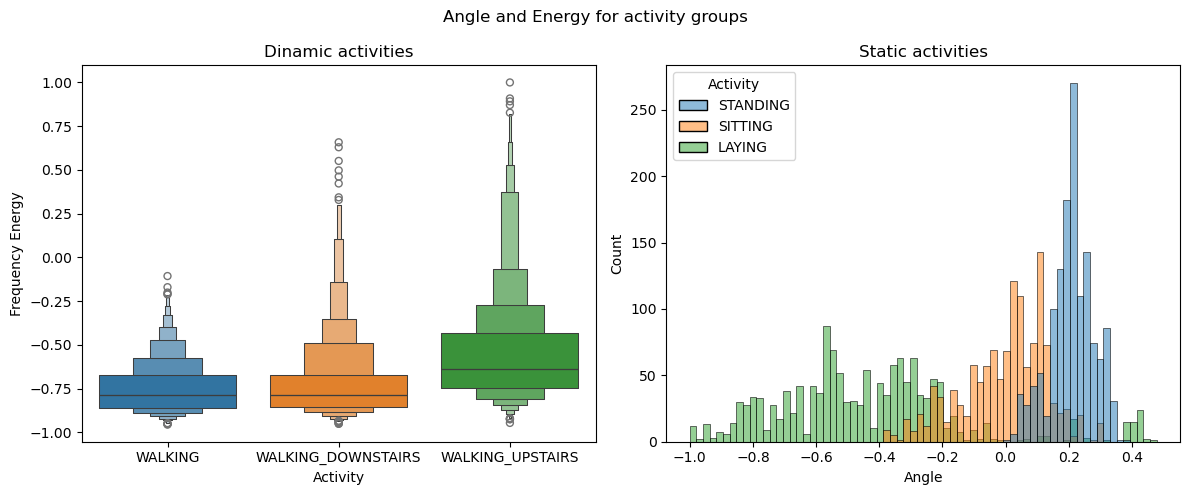

In [27]:
dinamic = train[train["Activity"].isin(["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"])]
static  = train[train["Activity"].isin(["STANDING", "SITTING", "LAYING"])]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.boxenplot(ax=axes[0], x="Activity", y="fBodyAcc-bandsEnergy()-1,8.2", hue="Activity", data=dinamic)
axes[0].set_title("Dinamic activities")
axes[0].set_xlabel("Activity")
axes[0].set_ylabel("Frequency Energy")



sns.histplot(ax=axes[1], x=static["angle(Y,gravityMean)"], bins=70, hue=static["Activity"], data=static)
axes[1].set_title("Static activities")
axes[1].set_xlabel("Angle")
axes[1].set_ylabel("Count")




plt.suptitle("Angle and Energy for activity groups")
plt.tight_layout()
plt.show()

Для WALKING разброс данных получился меньше, что свидетельсвует о более стабильной частоте и интенсивности  движений в ходе этой активности. В гистограмме данных по статическим активностям видим, что у STANDING более выражен пик распределения угла, также большинство значений больше 0, это скорее всего свидетельствует о том что тело немного наклонено и более устойчиво во время ходьбы.

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

In [7]:
static_2 = train[train["Activity"].isin(["STANDING", "SITTING", "LAYING"])]

In [41]:
static_3 = train[(train["Activity"].isin(["STANDING", "SITTING", "LAYING"])) & (train["fBodyAcc-skewness()-X"] < -0.376)]

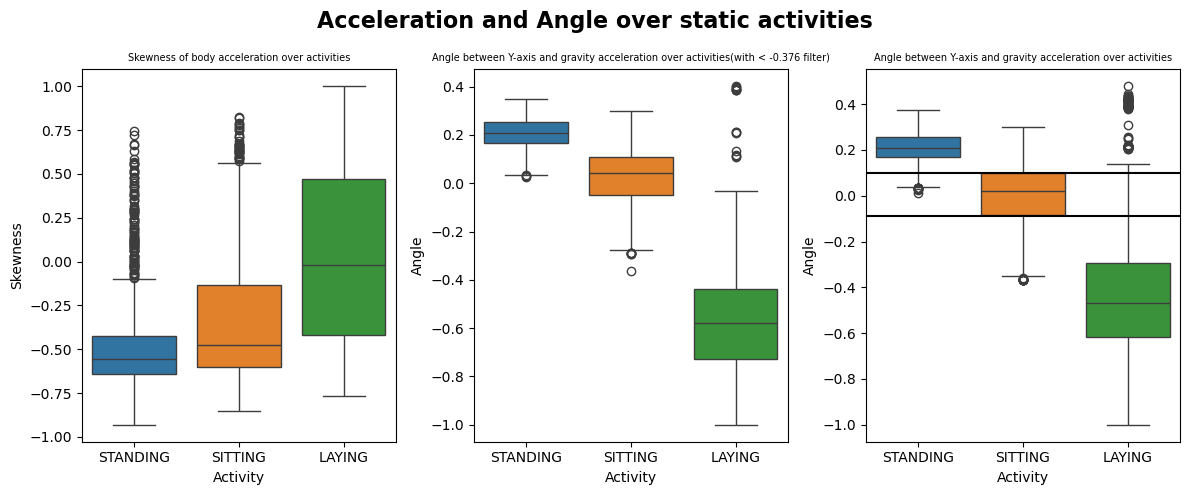

In [358]:

fig, axes = plt.subplots(1, 3, figsize=(12, 5))


sns.boxplot(ax=axes[0], x="Activity", y=static_2["fBodyAcc-skewness()-X"], hue="Activity", data=static_2)
axes[0].set_title("Skewness of body acceleration over activities", fontsize=7)
axes[0].set_xlabel("Activity")
axes[0].set_ylabel("Skewness")


sns.boxplot(ax=axes[1], x="Activity", y=static_3["angle(Y,gravityMean)"], hue="Activity", data=static_3)
axes[1].set_title("Angle between Y-axis and gravity acceleration over activities(with < -0.376 filter)", fontsize=7)
axes[1].set_xlabel("Activity")
axes[1].set_ylabel("Angle")


sns.boxplot(ax=axes[2], x="Activity", y=static_2["angle(Y,gravityMean)"], hue="Activity", data=static_2)
axes[2].set_title("Angle between Y-axis and gravity acceleration over activities", fontsize=7)
axes[2].set_xlabel("Activity")
axes[2].set_ylabel("Angle")

plt.axhline(-0.09, c="black")
plt.axhline(0.1, c="black")

plt.suptitle("Acceleration and Angle over static activities", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

In [558]:
dinamic_2 = train[train["Activity"].isin(["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"])]

In [572]:
dinamic_3 = train[(train["Activity"].isin(["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"])) & (train["tBodyAcc-max()-X"] < 0.157)]

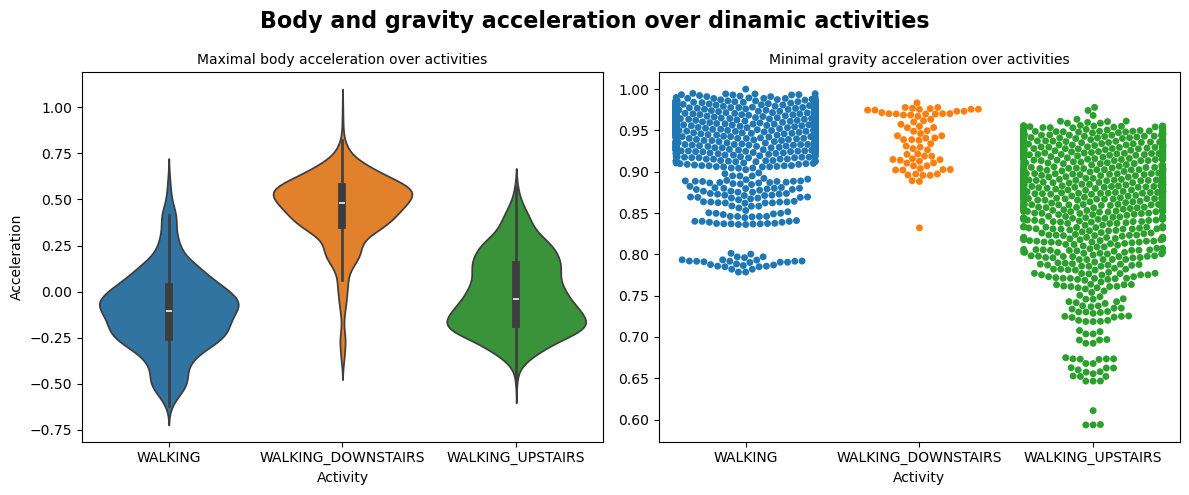

In [580]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.violinplot(ax=axes[0], x="Activity", y=dinamic_2["tBodyAcc-max()-X"], hue="Activity", data=dinamic_2)
axes[0].set_title("Maximal body acceleration over activities", fontsize=10)
axes[0].set_xlabel("Activity")
axes[0].set_ylabel("Acceleration")


sns.swarmplot(ax=axes[1], x="Activity", y=dinamic_3["tGravityAcc-min()-X"], hue="Activity", data=dinamic_3)
axes[1].set_title("Minimal gravity acceleration over activities", fontsize=10)
axes[1].set_xlabel("Activity")
axes[1].set_ylabel("")

plt.suptitle("Body and gravity acceleration over dinamic activities", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [598]:
import plotly.express as px

In [584]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 3min 46s, sys: 59 s, total: 4min 45s
Wall time: 48 s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

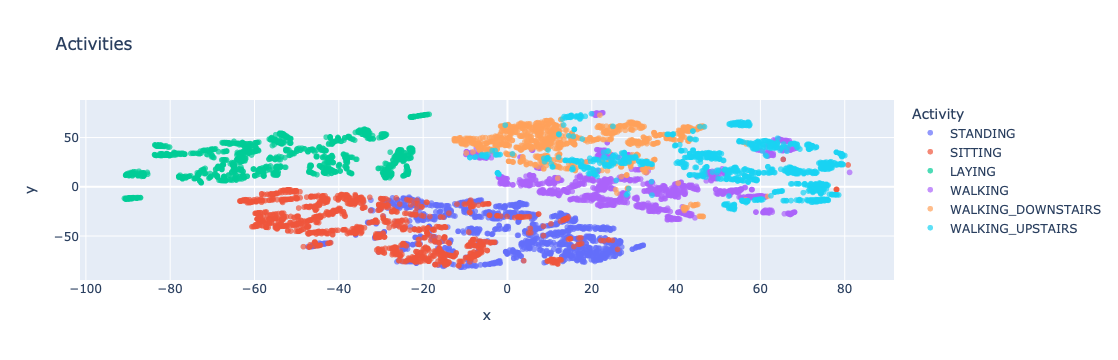

In [608]:
px.scatter(df_2_comp, 
                 x=df_2_comp.iloc[:, 0],
                 y=df_2_comp.iloc[:, 1],
                 color=df_2_comp["Activity"],
                 title="Activities",
                 opacity=0.7)

Можно, но видны значительные смешения разных типов активностей, разделение будет неточным.

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

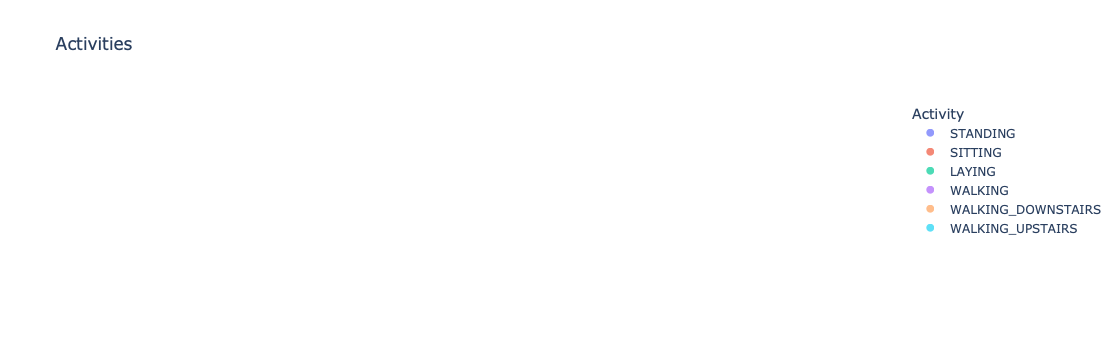

In [611]:
px.scatter_3d(df_3_comp, 
                     x=df_3_comp.iloc[:, 0], 
                     y=df_3_comp.iloc[:, 1],
                     z=df_3_comp.iloc[:, 2],
                     color=df_3_comp["Activity"],
                     title="Activities",
                     opacity=0.7)

Да, здесь структура просматривается уже лучше, видны активности по группам, точки распределены в кучные скопления.

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шпаргалка с готовыми идеями для такой задачи](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/)

In [614]:
def predict(df: pd.DataFrame):
    predictions = []
    
    for _, row in df.iterrows():
        if row["tBodyAccMag-mean()"] < -0.5:
            
            if row["angle(X,gravityMean)"] > 0.18:
                predictions.append("LAYING")
                
            elif -0.09 < row["angle(Y,gravityMean)"] < 0.1:
                 predictions.append("SITTING")
                
            else:
                predictions.append("STANDING")
                
        else:
            
            if row["tBodyAcc-max()-X"] > 0.2:
                predictions.append("WALKING_DOWNSTAIRS")
                
            elif row["tGravityAcc-min()-X"] < 0.955:
                 predictions.append("WALKING_UPSTAIRS")
                
            else:
                predictions.append("WALKING")
                
        
    return np.array(predictions)
    

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [616]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.7585690968443961
Accuracy on test set => 0.7522904648795385


__Место для мема и/или фидбэка__

> тут